# Assignment 11: Clustering Customers of a Comic Book Store

In this assignment, you will be solving a traditional problem in quantitative marketing: Customer segmentation. Having a properly segmented database is extremely important to define marketing campaigns, as it allows companies to define value-centric actions targeted towards customers of different profiles. While there are several ways we can cluster customers, in this example we will use the [Recency, Frequency and Monetary Value](https://en.wikipedia.org/wiki/RFM_(market_research)), or RFM, paradigm to do so. This way of thinking of customer data reflects the engagement between a customer and a company by reducing their interactions to three values:

- The **Recency** between interactions: The time between two subsequent purchases or between two general interactions between the customer and your organization.

- The **Frequency** of interactions: The raw number of interactions over a predefined time. This can be for example how many times a customer visits your website every month, or how many purchases the customer does at your store, etc.

- The **Monetary Value** of the interactions: The total monetary value (not necessarily positive) of the interactions of the customer with your organization over the same period of time as before.

Additionally, this dataset has a **Cost of Service** variable (which is not included in the MV calculations for this example). It shows how much cost each interaction with the customer brings. This can be useful information as a customer may make purchases of small monetary value, but may spend many hours at the store occupying the service personnel's time. This can mean on average these customers may even end up being a cost to the company! The information comes from a local comic book store, and represents the summary of interactions of the customers with a loyalty card.

In this assignment, we will create a clustering of the customers using these four variables and will create a commercial strategy arising from our results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# Uncomment if working in the cloud
#!gdown https://drive.google.com/uc?id=1VL-LjrjgCtGWkDw914MVLj2sEttlL2Uv

## Task 1: Studying the data [10 pts]

Import the data and present the descriptive statistics of all variables. **Written answer: What can you say about the variables you have? Why should you normalize the data?**. Normalize the data so you can create clusters.

In [3]:
# Read the data
data = pd.read_csv('RFM_Assignment_Week11.csv')
data.describe()

,Recency,Frequency,MV,CoS
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,30.116293,17.164128,8806.972152,8805.228492
std,17.742131,29.419952,3391.111080,3285.384316
min,-4.942628,-1.237633,760.115629,944.136187
25%,18.221827,3.710640,8065.394231,9957.361435
50%,28.588186,6.030687,10462.416975,10000.463454
75%,35.880252,9.999136,10608.634596,10041.297949
max,67.258701,102.189321,11139.504803,11054.536104


In [4]:
# Normalize (Standard) and apply to the data
scale = StandardScaler()
data_scaled = scale.fit_transform(data) # Scale the data

**Written answer:** The variables all have extremely different ranges - MV and CoS are much larger values than Recency and Frequency. We normalize the data so that these variables will not dominate the clustering process. 

## Task 2: K-Means Clustering and Silhoutte Analysis [30 pts]

Now we can perform the cluster analysis. The single most important question in cluster analysis is to determine the number of clusters that you should create. Following the labs (or [this tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)), try between 3 and 8 clusters, using a seed of 10, and plot their silouhette analyses (we will plot the clusters themselves in the next question). **Written answer: What is the optimal number of clusters using the silhouette method?**

('For n_clusters =', 3, 'The average silhouette_score is:', 0.7441085737382345)
('For n_clusters =', 4, 'The average silhouette_score is:', 0.7899120450839303)
('For n_clusters =', 5, 'The average silhouette_score is:', 0.7249329012890495)
('For n_clusters =', 6, 'The average silhouette_score is:', 0.6556732220239837)
('For n_clusters =', 7, 'The average silhouette_score is:', 0.6513064350384186)
('For n_clusters =', 8, 'The average silhouette_score is:', 0.6142740011419974)


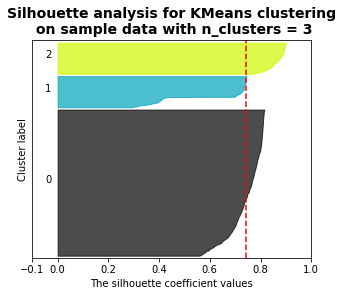

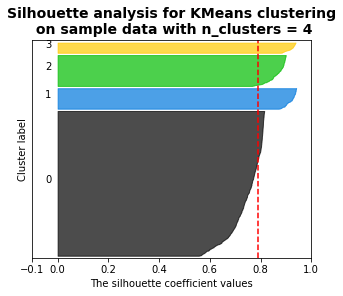

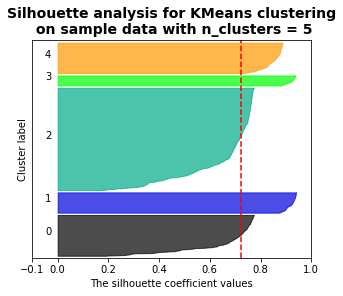

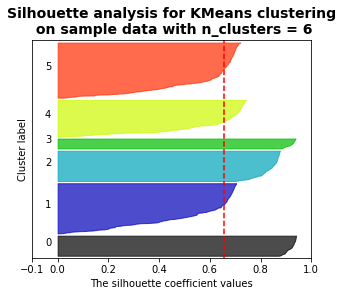

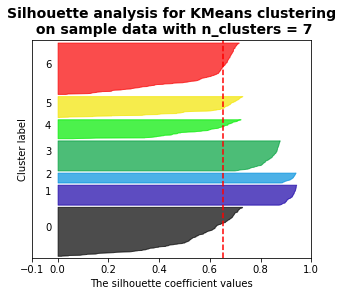

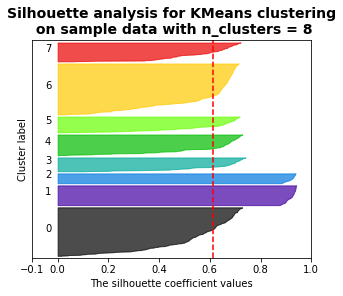

In [5]:
# Your answer here.

# Define X and y
X = data_scaled
y = data_scaled.shape[0] # Customer index

cluster_range = [3, 4, 5, 6, 7, 8]

for clusters in cluster_range:
    fig, ax1 = plt.subplots(1, 1) # Create a subplot
    fig.set_size_inches(5, 4) # Set plot size

    # Create silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (clusters + 1) * 10]) # Make space between clusters

    # Initialize KMeans
    kmeans_c = KMeans(n_clusters=clusters, random_state=10)
    cluster_labels = kmeans_c.fit_predict(X)

    # Get silhouette average
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", clusters, "The average silhouette_score is:", silhouette_avg)

    # Computer silhouette scores for each sample
    sample_silhouette_vals = silhouette_samples(X, cluster_labels)

    y_lower = 10

    for i in range(clusters):
        # Aggregate silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_vals = sample_silhouette_vals[cluster_labels == i]

        ith_cluster_silhouette_vals.sort()

        size_cluster_i = ith_cluster_silhouette_vals.shape[0] # Get the size of the cluster
        y_upper = y_lower + size_cluster_i

        # Set colour
        color = cm.nipy_spectral(float(i) / clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the plots
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 
    
    # Make plot
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for KMeans clustering\n on sample data "
                  "with n_clusters = %d" % clusters),
                 fontsize=14, fontweight='bold')

**Written answer:** The optimal number of clusters is 4, because this is the silhouette graph with the least variance in average silhouette scores. As we increase clusters, the average between clusters becomes too dispersed and the sizes between clusters fluctuate too much. 

## Task 3: Plotting the clusters [20 pts]

Now we will visualize what we just did. For this we will use a common trick in clustering: use a PCA transform to reduce the data to a few variables (two or three) and plot those. Apply a PCA transform to the data using two components and create a scatterplot, differentiating by using colours the clusters from previous answer using a different colour. **Note the clusters still must be calculated over the unrotated data**. Use only your results from using 3, 4 and 5 clusters. **Written answer: How many clusters would you use considering the results of task 2 and these ones?**

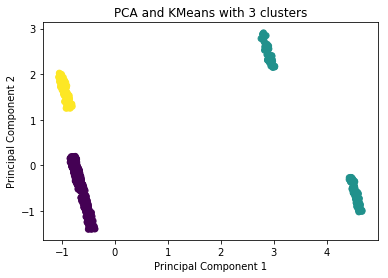

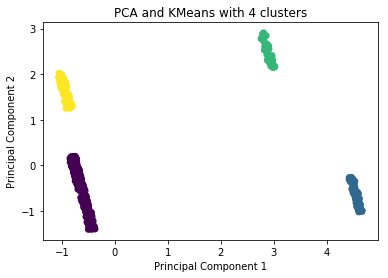

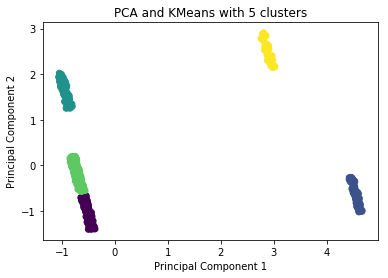

In [6]:
# Your code here. Add as many cells as you need!
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)
reduced_data = pd.DataFrame(reduced_data)

for clusters in range(3,6):
    kmeans_c = KMeans(n_clusters=clusters, random_state=10)

    # Fit model
    kmeans_c.fit(reduced_data.iloc[:, :2])
    cluster_labels = kmeans_c.predict(reduced_data.iloc[:, :2])

    plt.scatter(reduced_data[0], reduced_data[1], c=cluster_labels)
    plt.title('PCA and KMeans with %d clusters' % clusters)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()



**Written answer** I would choose 4 clusters because both the results from PCA and Silhouette illustrate that 4 is the optimal choice. 4 is the optimal choice here because all of the clusters are seperated properly by color. 

## Task 4: Deploying the model. [20 pts]

The objective of any cluster analysis over customer data is to create a reasonable segmentation of your customers. Using the number of clusters you have decided in Task 3 and a table of the averages per variable for each cluster, name the different clusters and think what would a company would do with a customer in that cluster. (*Hint: For example a clusters with high frequency, low recency, and low monetary value are desirable customers for whom it would be a good plan to try to increase their monetary value while keeping their high engagement. You could name them "Diamonds in the rough". [Pandas' `groupby`](https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average) can probably help.*)

In [7]:
# Your code here.
kmeans_4 = KMeans(n_clusters=4, random_state=10).fit(data_scaled)
cluster_labels = kmeans_4.predict(data_scaled)

clustered_data = data.copy()
clustered_data['cluster'] = cluster_labels

# Get averages for each cluster
print(clustered_data.groupby(['cluster']).mean())



           Recency  Frequency            MV           CoS
cluster                                                  
0        25.701424   6.473078  10638.156654   9999.979644
1         2.167553  99.947029   1153.133946   1005.710736
2        59.809092   0.868768   8007.350500  11001.099604
3        58.743535  50.159107    876.930495   1090.134542


The Recency between interactions: The time between two subsequent purchases or between two general interactions between the customer and your organization.

The Frequency of interactions: The raw number of interactions over a predefined time. This can be for example how many times a customer visits your website every month, or how many purchases the customer does at your store, etc.

The Monetary Value of the interactions: The total monetary value (not necessarily positive) of the interactions of the customer with your organization over the same period of time as before.

Additionally, this dataset has a Cost of Service variable (which is not included in the MV calculations for this example). It shows how much cost each interaction with the customer brings. This can be useful information as a customer may make purchases of small monetary value, but may spend many hours at the store occupying the service personnel's time. This can mean on average these customers may even end up being a cost to the company! The information comes from a local comic book store, and represents the summary of interactions of the customers with a loyalty card.

**Written answer: (note this answer will be much longer than usual as you need to make an argument for every cluster)**

** Cluster 0 (High Potential): ** These customers have a recency closer to average, a low frequency and very high monetary value. The company would benefit from attempting to increase the frequency of these customers so that they interact with the company more regularly, which would potentially lead to more purchases. These scores may also indicate a new customer which means that the company would benefit from making efforts to make these customers more engaged. 

** Cluster 1 (Loyal But On A Budget): ** These customers have low recency, very high frequency, and low monetary value. The company should try to increase monetary value of these customers by perhaps encouraging the customers to spend more money on each purchase. This would result in the customers remaining highly engaged (which is good for the company) while providing more monetary value. 

** Cluster 2 (One-Time Big Spenders): ** These customers have high recency, very low frequency, and high monetary value. These are customers who may have made a one-time expensive purchase in the past and need an incentive to engage again. The company would benefit from increasing the frequency and decreasing the recency by encouraging these customers to interact again. If they interact more, they may continue to make large purchases. 

** Cluster 3 (Not Worth The Effort): ** These customers have high recency, high frequency, and low monetary value. These are customers who used to engage a lot with the company, however they weren't that valuable in the first place since they have such low monetary value. The company can just let these customers go, since it will be harder to get them to re-engage (due to the high recency) and they didn't provide the company with much value. However, the company may benefit from attempting to remind these customers to return and giving them incentive to spend more money. 

## Task 5: Hierarchical clustering comparison [20 pts]

Now repeat the clustering process using a complete linkage hierarchical clustering with cosine affinity, using the same number of clusters as Task 4. Using the PCA transform you calculated in Task 3, create a scatterplot differentiating the obtained clusters using different colours. **Written answer: What can you say about the new clustering you obtained? Why does this happen? When would you say it is a good idea to use this configuration?** 

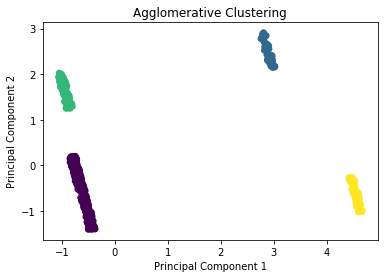

In [8]:
# Your code here
ac = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='single')

cluster_labels = ac.fit_predict(reduced_data.iloc[:, :2])

plt.scatter(reduced_data[0], reduced_data[1], c=cluster_labels)
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



**Written answer:** The clustering looks the same as KMeans. I think this happened because the clusters are extremely dense and far apart, making it easy for KMeans to detect even though KMeans tends to produce more round clusters. However, these long and stringy clusters are perfect for single linkage agglomerative clustering to detect. This configuration is good to use if the strings of data were more closely packed; KMeans may have a hard time detecting the clusters however Agglomerative clustering would easily detect densely packed data points. KMeans does a good job here because there's evidently 4 clusters with a lot of space in between them. 